In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.integrators import *
from scripts.plotting import plot_energy_behaviour_frb

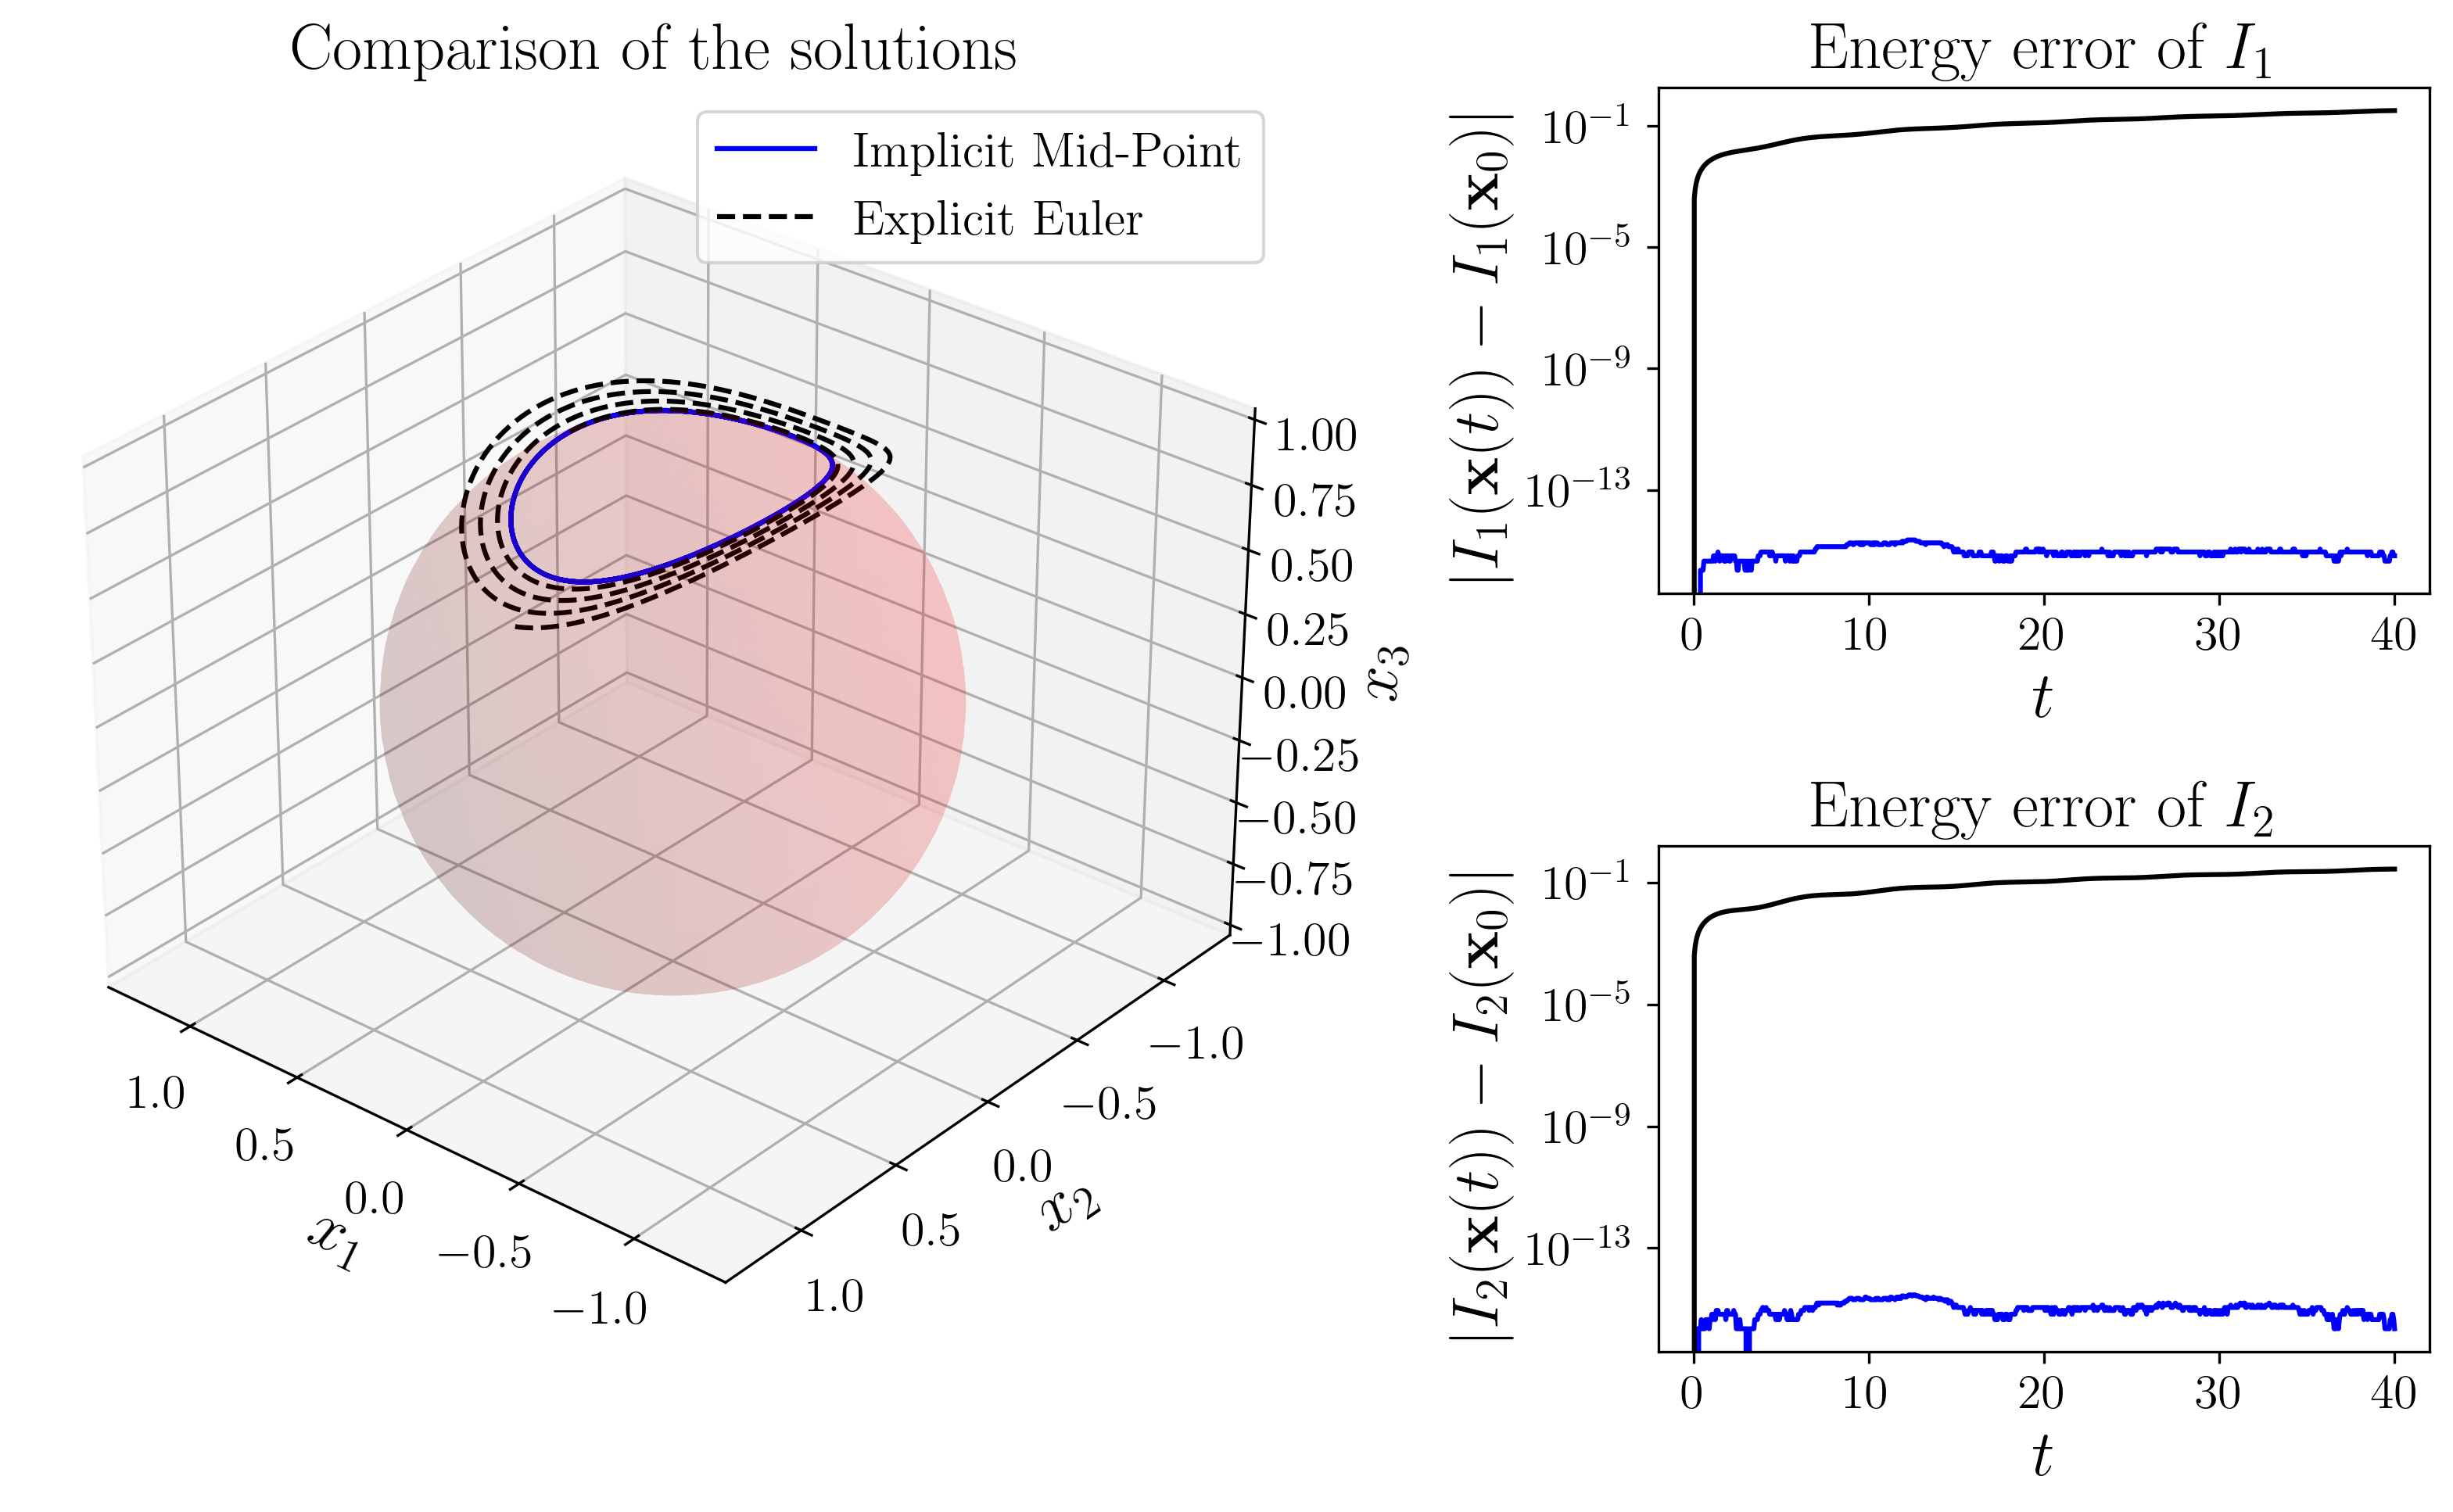

In [2]:
I1,I2,I3 = 2.,1.,2/3
inertia_matrix = np.diag([I1,I2,I3])
y0 = np.array([np.cos(1.1),0.,np.sin(1.1)])

H = lambda y : (y[0]**2+y[1]**2+y[2]**2)
def B(y):
    I1,I2,I3 = 2.,1.,2/3
    return np.array([[0.,y[2]/I3,-y[1]/I2],[-y[2]/I3,0.,y[0]/I1],[y[1]/I2,-y[0]/I1,0.]])

f = lambda t,y : B(y)@y

h = 0.05
N = 800
timespan = np.linspace(0,N*h,N+1)

sol_EE = np.zeros((3,N+1))
sol_IMP = np.zeros((3,N+1))

sol_EE[:,0] = y0
sol_IMP[:,0] = y0

for i in range(N):
  sol_EE[:,i+1] = sol_EE[:,i] + h * f(i*h,sol_EE[:,i])

for i in range(N):
    sol_IMP[:,i+1] = implicit_midpoint_step(i*h,sol_IMP[:,i],h,f)
  
plot_energy_behaviour_frb(timespan,sol_EE,sol_IMP,inertia_matrix)